In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df = df_index.copy()
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [5]:
df.drop(columns=["year","month"], inplace=True)
df

,Unnamed: 0,interest_rate,unemployment_rate,index_price
0,0,2.75,5.3,1464
1,1,2.50,5.3,1394
2,2,2.50,5.3,1357
3,3,2.50,5.3,1293
4,4,2.50,5.4,1256
5,5,2.50,5.6,1254
6,6,2.50,5.5,1234
7,7,2.25,5.5,1195
8,8,2.25,5.5,1159
9,9,2.25,5.6,1167


In [6]:
df.isnull().sum()

Unnamed: 0           0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

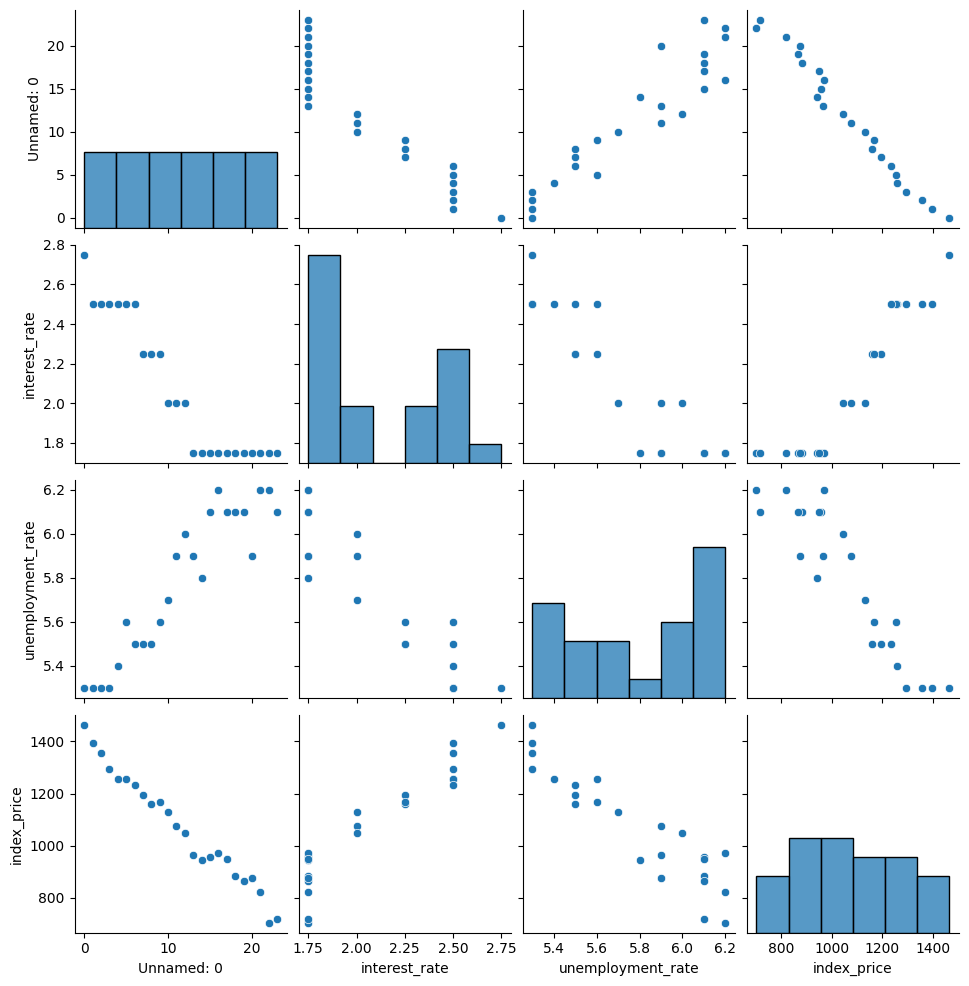

In [7]:
import seaborn as sns
sns.pairplot(df)

In [8]:
df.corr()

,Unnamed: 0,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-0.934555,0.935300,-0.988246
interest_rate,-0.934555,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-0.925814,1.000000,-0.922338
index_price,-0.988246,0.935793,-0.922338,1.000000


In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x

,Unnamed: 0,interest_rate,unemployment_rate
0,0,2.75,5.3
1,1,2.50,5.3
2,2,2.50,5.3
3,3,2.50,5.3
4,4,2.50,5.4
5,5,2.50,5.6
6,6,2.50,5.5
7,7,2.25,5.5
8,8,2.25,5.5
9,9,2.25,5.6


In [10]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16, 3), (8, 3), (16,), (8,))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train

array([[ 1.19611583, -0.89073374,  1.25707872],
       [-1.05539632,  1.35954097, -0.62853936],
       [-1.47755484,  1.35954097, -1.5713484 ],
       [-0.07035975, -0.14064217,  0.62853936],
       [ 0.35179877, -0.89073374,  0.94280904],
       [-1.33683533,  1.35954097, -1.5713484 ],
       [-1.19611583,  1.35954097, -1.25707872],
       [ 1.33683533, -0.89073374,  1.25707872],
       [ 0.63323779, -0.89073374,  0.94280904],
       [ 1.05539632, -0.89073374,  0.31426968],
       [ 1.47755484, -0.89073374,  0.94280904],
       [-0.7739573 ,  0.6094494 , -0.94280904],
       [-0.35179877, -0.14064217, -0.31426968],
       [ 0.21107926, -0.89073374,  0.        ],
       [ 0.91467681, -0.89073374,  0.94280904],
       [-0.91467681,  1.35954097, -0.94280904]])

In [13]:
x_test

array([[-0.24743583,  0.35355339, -0.6882472 ],
       [ 1.07222193, -1.06066017,  1.45296631],
       [-1.56709359,  1.76776695, -1.30002249],
       [ 1.40213637, -1.06066017,  1.14707867],
       [ 0.24743583, -0.35355339,  0.53530338],
       [-0.08247861,  0.35355339, -0.38235956],
       [ 0.57735027, -1.06066017,  0.53530338],
       [-1.40213637,  1.06066017, -1.30002249]])

In [14]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(linear, x_train, y_train, scoring='neg_mean_squared_error',cv=5)
score.mean()

np.float64(-1751.225075648896)

In [16]:
y_pred = linear.predict(x_test)
y_pred

array([1088.33798377,  819.70944255, 1354.5440355 ,  753.19833853,
        987.27926518, 1054.35568491,  921.65633914, 1322.41891042])

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

10544.728810160463

In [18]:
from statsmodels.api import OLS as sm
model = sm(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.037
Model:                            OLS   Adj. R-squared (uncentered):             -0.186
Method:                 Least Squares   F-statistic:                             0.1653
Date:                Mon, 03 Nov 2025   Prob (F-statistic):                       0.918
Time:                        13:23:25   Log-Likelihood:                         -133.83
No. Observations:                  16   AIC:                                      273.7
Df Residuals:                      13   BIC:                                      276.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -203.0696    968.001     -0.210      0.837   -2294.309    1888.170
x2            -1.9413    848.443     -0.002      0.998   -1834.890    1831.007
x3            -1.5839    853.096     -0.002      0.999   -1844.587    1841.419
==============================================================================
Omnibus:                        0.884   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.531
Skew:                          -0.426   Prob(JB):                        0.767
Kurtosis:                       2.736   Cond. No.                         6.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""